## Regression 

### Simple Linear Regression

Linear regression is  a linear or straight line relationship between the input variables (X) and the single output variable (y).

<img src='images/lr.png' width="45%"/>

### Let us consider a dataset where we have a value of response y for every feature x:

In [2]:
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

### x as a feature vector and y as a response vector

### A scatter plot of above dataset looks like:-

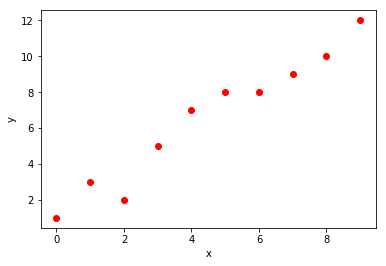

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red')

# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#### Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)

- This line is called regression line.

<img src="images/lin_reg.PNG" width="20%"/>
<img src="images/bfind.PNG" width="90%"/>

In [ ]:
### find m and b

In [7]:
def best_fit_slope(x,y):
    m= (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y) - m*np.mean(x)
   
    return m,b

In [8]:
m,b = best_fit_slope(x,y)
print (m,b)

(1.1696969696969695, 1.2363636363636372)


In [ ]:
reg=[]
for i in x:
    reg.append((m*i+b))

In [ ]:
#m*2+b

In [9]:
regression_line = [(m*i+b) for i in x]    

In [16]:
regression_line

[1.2363636363636372,
 2.4060606060606067,
 3.575757575757576,
 4.745454545454546,
 5.915151515151515,
 7.084848484848485,
 8.254545454545454,
 9.424242424242422,
 10.593939393939394,
 11.763636363636362]

In [11]:
y

array([ 1,  3,  2,  5,  7,  8,  8,  9, 10, 12])

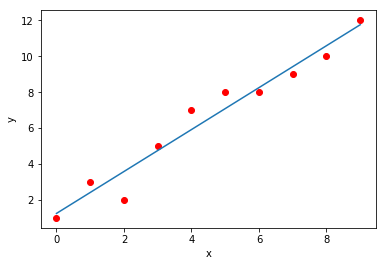

In [19]:
# for visualization
plt.scatter(x,y,color='red')
#plt.scatter(x,regression_line,color='black')
#plt.scatter(predict_x,predict_y,color='green')
plt.plot(x, regression_line)
# putting labels
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### R^2 (coefficient of determination):regression score function.


- The R^2 (or R Squared) metric provides an indication
  of the goodness of fit of a set of predictions to the
  actual values. In statistical literature,
  this measure is called the coefficient of determination.

- a model fits the data well if the differences between the
  observed values and the model's predicted values are small.

- R-squared is a statistical measure of how close the data
  are  to the fitted regression line.

- the higher the R-squared, the better the model fits your
  data.

- value between 0 and 1 

- The distance between the regression line's y values,
  and the data's y values is the error, then we square that. 


<img src='images/r2.PNG' width='40%'/>

### 1-((sum of the squared error of the line) / (sum of squared error of the y mean))

- **SE line** = (y1-(mx1+b))+(y2-(mx2+b))+.....(yn-(mxn+b))


- **SE y mean** = (y1-mean(y))+(y2-mean(y))+....(yn-mean(y))

if SE line is small ==> line is a good fit or r^2 close to 1

if SE line is large ===> r^2 close to 0 (i.e line is not fitted well)



<img src="images/rsq.png" />

In [20]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [21]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [22]:
r_squared = coefficient_of_determination(y,regression_line)
print(r_squared)

0.952538038613988


### Now Using scikit-learn...

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
x.ndim

1

In [25]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
x.reshape(-1,1).ndim

2

In [ ]:
#x.reshape(-1,1).ndim

In [31]:
x_new=x.reshape(-1,1)

In [32]:
x_new.ndim

2

In [ ]:
lg = LinearRegression()
#lg.fit(x_new,y)

In [ ]:
#fit(x,y):train model/algorithm with data
#predict():make prediction

In [ ]:
lg.fit(x_new,y)

In [ ]:
print lg.coef_[0]
lg.intercept_


In [ ]:
x_new[1][0]*lg.coef_[0]+lg.intercept_

In [ ]:
y_pred=lg.predict(x_new)

#y_true,y_pred
r2_score(y,y_pred)

In [ ]:
#x_new[1][0]*lg.coef_[0]+lg.intercept_

In [ ]:
y_pred[1]

In [ ]:
y_pred[1]

### Take another example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('dataset/Salary_Data.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
#print data.columns

In [ ]:
X = data.iloc[:,0].values

In [ ]:
y = data['Salary'].values

### split data into training and testing test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=5,random_state=10)

In [ ]:
#X_train.shape
#X_test.shape

In [ ]:
#X_test

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_new=X_train.reshape(-1,1)
X_test_new = X_test.reshape(-1,1)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_new,y_train)

In [ ]:
print lin_reg.coef_
lin_reg.intercept_


In [ ]:
y_pred = lin_reg.predict(X_test_new)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
plt.scatter(X_train,y_train,color='red')   #training data
#plt.scatter(X_test,y_test,color='blue')   #testing data
plt.scatter(X_test,y_pred,color='black')   #testing data
plt.plot(X_train,lin_reg.predict(X_train.reshape(-1,1)),color='green')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
y_test,X_test

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
#print boston.DESCR

In [ ]:
X=boston.data
y = boston.target

In [ ]:
X.shape


### multiple regression,
### polynomial reg

<img src="images/steps.PNG" width='80%' height='80%'/>